## Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2024-11-29 16:37:15.093 system_profiler[35598:1119717] CoreText note: Client requested name ".AlBayanPUA", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-11-29 16:37:15.093 system_profiler[35598:1119717] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2024-11-29 16:37:15.102 system_profiler[35598:1119717] CoreText note: Client requested name ".AlBayanPUA-Bold", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-11-29 16:37:15.110 system_profiler[35598:1119717] CoreText note: Client requested name ".AlNilePUA", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSiz

In [3]:
train_data = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
images = train_data['Product Image Url']
images[0]

'https://i5.walmartimages.com/asr/0e1f4c51-c1a4-4f38-91bb-fd19317e3e20.aae056ad1dcaab1abc7f13c21ca53440.jpeg'

In [5]:
train_data.describe()

,Dataset Origin,Product Barcode,Match Rank,Match Score,Match Type,Product Price,Sku,Upc,Product Available Inventory,Product Model Number,Product Contents,Product Rating,Product Reviews Count,Bsr
count,0.0,0.0,0.0,0.0,0.0,4958.000000,0.0,0.0,5000.0,0.0,0.0,2194.000000,3346.000000,0.0
mean,NaN,NaN,NaN,NaN,NaN,23.364425,NaN,NaN,111111111.0,NaN,NaN,4.294622,571.035565,NaN
std,NaN,NaN,NaN,NaN,NaN,35.182204,NaN,NaN,0.0,NaN,NaN,0.773311,2485.699363,NaN
min,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,111111111.0,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,8.400000,NaN,NaN,111111111.0,NaN,NaN,4.000000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,14.950000,NaN,NaN,111111111.0,NaN,NaN,4.500000,20.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,26.007500,NaN,NaN,111111111.0,NaN,NaN,4.800000,170.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,722.450000,NaN,NaN,111111111.0,NaN,NaN,5.000000,29242.000000,NaN


In [6]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Price', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head()

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Price,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [7]:
train_data.shape

(5000, 11)

In [8]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Price              42
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [9]:
train_data['Product Rating'].fillna(0, inplace = True)
train_data['Product Reviews Count'].fillna(0, inplace = True)
train_data['Product Price'].fillna(100.0, inplace = True)
train_data['Product Category'].fillna('', inplace = True)
train_data['Product Brand'].fillna('', inplace = True)
train_data['Product Description'].fillna('', inplace = True)

/var/folders/_s/7_jh3nvd2xv2t52w6m622_rh0000gn/T/ipykernel_35452/3080855108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0, inplace = True)
/var/folders/_s/7_jh3nvd2xv2t52w6m622_rh0000gn/T/ipykernel_35452/3080855108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [10]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Price            0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [11]:
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'PID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Price': 'Price',
    'Product Image Url': 'ImgURL',
    'Product Description': 'Desc',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

train_data.rename(columns = column_name_mapping, inplace = True)

In [12]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['PID'] = train_data['PID'].str.extract(r'(\d+)').astype(float)

In [13]:
train_data.head()

,ID,PID,Rating,ReviewCount,Category,Brand,Name,Price,ImgURL,Desc,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


## EDA on the Clean Data

In [13]:
num_users = train_data['ID'].nunique()
num_items = train_data['PID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


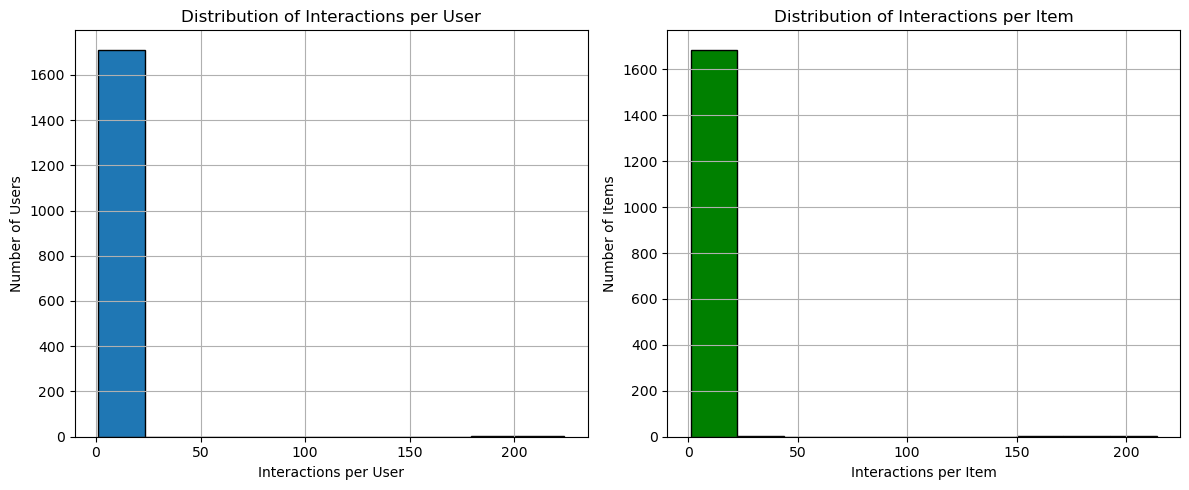

In [14]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['PID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

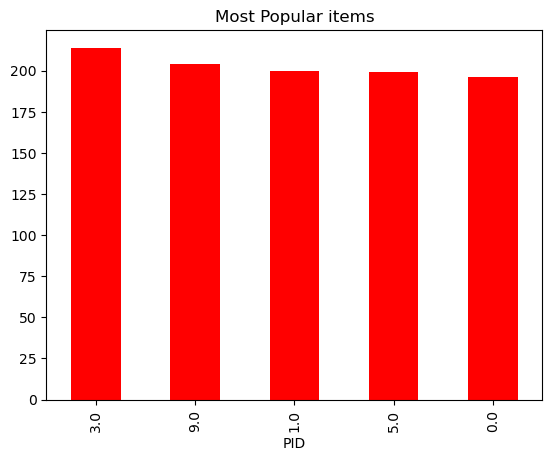

In [15]:
# Most popular items
popular_items = train_data['PID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

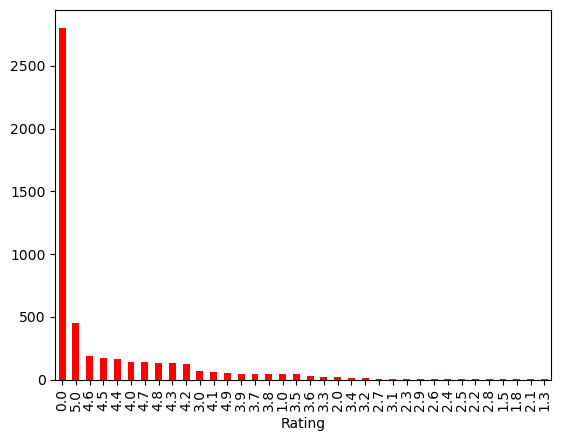

In [16]:
# Most rating count
train_data['Rating'].value_counts().plot(kind='bar',color='red')

## Tags Creation and Removing Stop words

In [20]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [21]:
clean = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = clean(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract = ['Category', 'Brand', 'Desc']

for column in columns_to_extract:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [22]:
train_data['Tags'] = train_data[columns_to_extract].apply(lambda row: ', '.join(row), axis = 1)

In [23]:
train_data.to_csv('train_data_with_tags.csv', index=False)

## Rating Based Recommendation System

In [26]:
train_data = pd.read_csv('train_data_with_tags.csv')
train_data.head()

,ID,PID,Rating,ReviewCount,Category,Brand,Name,ImgURL,Desc,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [27]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImgURL'])['Rating'].mean().reset_index()

In [28]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)
rating_base = top_rated_items.head(10)

In [29]:
rating_base['Rating'] = rating_base['Rating'].astype(int)
rating_base['ReviewCount'] = rating_base['ReviewCount'].astype(int)

/var/folders/_s/7_jh3nvd2xv2t52w6m622_rh0000gn/T/ipykernel_1765/989508376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base['Rating'] = rating_base['Rating'].astype(int)
/var/folders/_s/7_jh3nvd2xv2t52w6m622_rh0000gn/T/ipykernel_1765/989508376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base['ReviewCount'] = rating_base['ReviewCount'].astype(int)


In [30]:
print("Rating Base Recommendations: ")
rating_base[['Name','Rating','ReviewCount','Brand','ImgURL']] = rating_base[['Name','Rating','ReviewCount','Brand','ImgURL']]
rating_base

Rating Base Recommendations: 


/var/folders/_s/7_jh3nvd2xv2t52w6m622_rh0000gn/T/ipykernel_1765/1213689406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base[['Name','Rating','ReviewCount','Brand','ImgURL']] = rating_base[['Name','Rating','ReviewCount','Brand','ImgURL']]


,Name,ReviewCount,Brand,ImgURL,Rating
4275,Summers Eve Feminine Deodorant Spray Island Sp...,3,"summer, eve",https://i5.walmartimages.com/asr/49694d47-bfaa...,5
4622,"Vitamin E Beauty 14,000 IU Skin Oil 1 oz",3,jason,https://i5.walmartimages.com/asr/5db537a7-7117...,5
4627,"W8Less Plus Spray, Gel, Firm Hold By Rusk, 5.3 Oz",1,rusk,https://i5.walmartimages.com/asr/8a8f22e9-d560...,5
458,"Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz",1,ahava,https://i5.walmartimages.com/asr/cf65dfb4-5e5f...,5
3697,"Pureology Hydrating Conditioner, 33.8 Oz",13,pureology,https://i5.walmartimages.com/asr/909554f4-cc0a...,5
460,Air Freshener Febreze,2,febreze,https://i5.walmartimages.com/asr/61f581e6-c5dd...,5
4624,Volu Volume Enhancing Softening Shampoo,1,davines,https://i5.walmartimages.com/asr/e667c965-1f6a...,5
1387,Daily Conditioner Conditionneur Quotidien 11.8...,1,reuzel,https://i5.walmartimages.com/asr/6ff7f6aa-35d6...,5
469,"Air Wick Freshmatic Refill Automatic Spray, Pa...",2,"air, wick",https://i5.walmartimages.com/asr/c75274f5-3ad9...,5
3696,"Pureology Curl Complete Uplifting Curl, 6.8 Oz",3,pureology,https://i5.walmartimages.com/asr/59e21d68-53db...,5


## Content Based Recommendation System

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [33]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name'] == item_name].index[0]

In [34]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [35]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [36]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


## Content Based Recommendation Function

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    item_index = train_data[train_data['Name'] == item_name].index[0]
    similar_items = list(enumerate(cosine_similarities_content[item_index]))
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    top_similar_items = similar_items[1:top_n+1]
    recommended_item_indices = [x[0] for x in top_similar_items]
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImgURL', 'Rating']]

    return recommended_items_details

In [40]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImgURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


## Collaborative Filtering

In [42]:
user_item_matrix = train_data.pivot_table(index='ID', columns='PID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [43]:
user_similarity = cosine_similarity(user_item_matrix)

In [44]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [45]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [46]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['PID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImgURL','Rating']]

In [47]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImgURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


## Function for Recommending Items

In [49]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    user_item_matrix = train_data.pivot_table(index='ID', columns='PID', values='Rating', aggfunc='mean').fillna(0)

    user_similarity = cosine_similarity(user_item_matrix)
    target_user_index = user_item_matrix.index.get_loc(target_user_id)
    user_similarities = user_similarity[target_user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]
    recommended_items = []

    for user_index in similar_users_indices:
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])
    recommended_items_details = train_data[train_data['PID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImgURL', 'Rating']]

    return recommended_items_details.head(10)

In [50]:
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImgURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


## Hybrid Recommendations

In [51]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [52]:
target_user_id = 4
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImgURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0
